### Student Information
Name: Kissinger Sunday

Student ID: 110761502

GitHub ID: sundaykissy861/SNHC_7450_HW2

---

### Instructions

1. First: do the **take home** exercises in Part 1 of the [SNHC7450-Lab2-master Repo](https://github.com/fhcalderon87/SNHC7450_Lab2_master/blob/main/SNHC4750_Lab2_master.ipynb). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [SNHC7450-Lab2-master Repo](https://github.com/fhcalderon87/SNHC7450_Lab2_master/blob/main/SNHC4750_Lab2_master.ipynb) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 40% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and/or textbooks for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generat a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


Create a new repository on Github and upload your homework to it. Submit a link to the repository to my email __BEFORE the deadline (Dec. 27th 11:59 pm, Monday)__. 

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2



In [22]:

 #importing necessary packages and classes
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns



# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']



In [25]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [26]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [5]:
 #1 Please check the data and the process below, describe what you observe and why it happened.


### Begin Assignment Here



NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df







,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [6]:
NA_df['missing_example'].isnull()


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

# Exercise 2 (take home)- Solution

In [ ]:
Answer to Take Home #1

.isNull() did not work because anything inside either a single quote or double quote has an automatic value attached. 
furthermore, .isNull() does not work for the empty string such as ''.

The isNull() only takes care of the following:

None
numpy.NaN



In [23]:


"""
Helper functions for data mining lab 
Notations:
d - document
D - documents
V - vowels
w - word
W - words
l - letter
"""

def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.data:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

def format_my_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

def format_labels(target, docs):
    """ format the labels """
    return docs.target_names[target]

def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

In [27]:

# construct dataframe from a list
X = pd.DataFrame.from_records(format_rows(twenty_train), columns= ['text'])
print(X)

                                                   text
0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
...                                                 ...
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...

[2257 rows x 1 columns]


In [13]:
X[0:2]


,text
0,From: sd345@city.ac.uk (Michael Collier) Subje...
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...


In [14]:
# add category to the dataframe
X['category'] = twenty_train.target

In [15]:
# add category label also
X['category_name'] = X.category.apply(lambda t: format_labels(t, twenty_train))

In [12]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [16]:
X_sample = X.sample(n=1000) #random state
print(X_sample.category_name.value_counts())

soc.religion.christian    277
comp.graphics             261
sci.med                   250
alt.atheism               212
Name: category_name, dtype: int64


# Exercise 3 (take home) - Solution

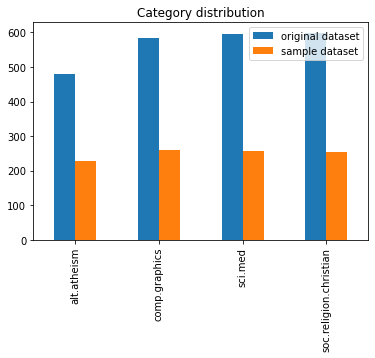

In [58]:
#Solution to homework 2


# plot barchart for X_sample
x=X_sample.category_name.value_counts()

# plot barchart for X_sample
y=X.category_name.value_counts()

#concatenate the two charts using the panda dataframe
df = pd.concat([y, x], axis=1, sort=True)

#set the keys
df.columns = ["original dataset", "sample dataset"]

#side by side comparison of the datasets
df.plot(kind="bar", title='Category distribution')

#displays the result using matplotlib
plt.show()


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [18]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [17]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:20]

['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007',
 '000usd',
 '0010',
 '001004',
 '0010580b',
 '001125',
 '001200201pixel',
 '0014',
 '001642',
 '00196',
 '002']

In [101]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [102]:
count_vect.transform(['00 Something completely new.000']).toarray()

array([[1, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:10]]

In [19]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:10]]

In [20]:
plot_z = X_counts[0:10, 0:10].toarray()


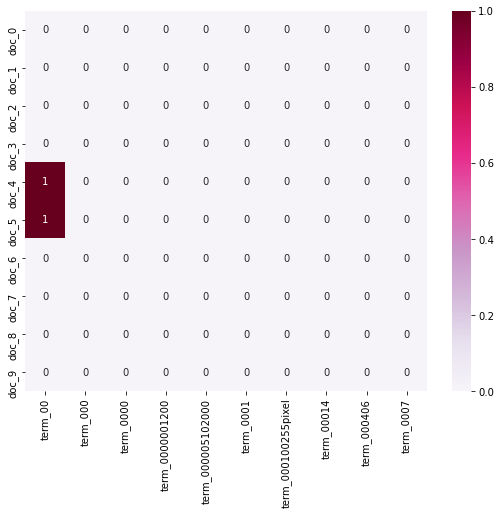

In [21]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# Exercise 5 (take home)-Solution

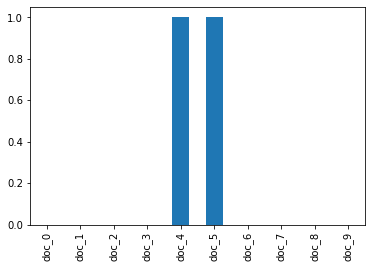

In [139]:
#Solution to Homework 3
# We employ the use of matplotlib to create a bar chart to visualize the term document matrix


# first 10 samples only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:10]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:10]]

plot_z = X_counts[0:10, 0:10].toarray()

df_todraw = pd.DataFrame(plot_z,  index = plot_y, columns = plot_x)
df_todraw['total_count']=plot_z.sum(axis=1)

df_todraw['total_count'].plot.bar()
plt.show()




# Exercise 6 (take home)-Solution

In [25]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [26]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())


In [27]:
X_reduced.shape


(2257, 3)

In [109]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

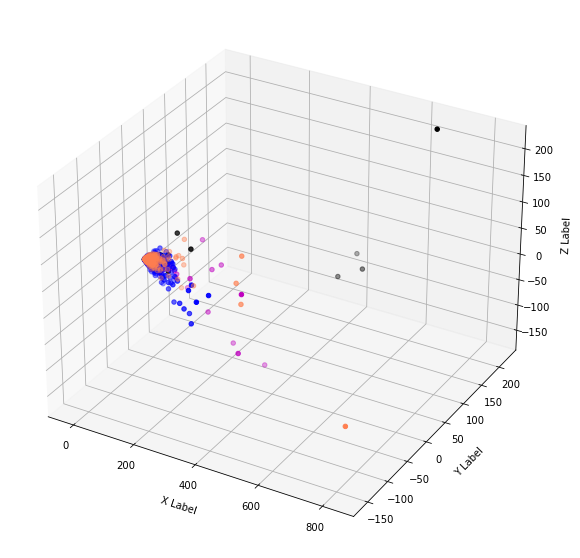

In [113]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

In [ ]:
From the 3D visualization above, we can observe some fewer seperation of data expecially from the X label of -200 and above
 i.e., they might still have some special grouping by category. The PCA was applied to the raw frequencies 




# Exercise 6 (take home)-Solution

In [34]:

#reducing the number of terms to lessen the computation time    
reduced_terms=PCA(n_components=5).fit_transform(X_counts[:10].toarray())

reduced_terms.shape

(10, 5)

In [41]:
# this now take less time to compute. 
term_frequencies = []
for j in range(0,reduced_terms.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [53]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [43]:
import plotly.express as px
#pio.renderers.default = "iframe"

long_df = px.bar(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])

#fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
long_df.show()

# Exercise 7 (take home)-Solution

In [79]:
#computing the frequencies of the term for efficient long tail visualization
from collections import Counter

cnt=Counter()
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
result=sorted(term_frequencies)

for n in result:
    cnt[n]+=1
    
sorted(cnt.items(), key=lambda item: item[1])

term=[]
frequency=[]

for n in cnt.keys():
    term.append(n)
    
for k in cnt.values():
    frequency.append(k)

print(term[:100])
print(frequency[:-100])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[14606, 5640, 2890, 1987, 1302, 987, 821, 686, 547, 472, 414, 317, 298, 282, 225, 197, 205, 143, 142, 139, 134, 121, 117, 91, 115, 93, 99, 97, 85, 59, 74, 67, 56, 57, 61, 43, 55, 42, 34, 47, 40, 28, 27, 38, 28, 32, 43, 38, 25, 28, 33, 28, 31, 25, 32, 26, 15, 23, 28, 19, 23, 31, 18, 25, 21, 18, 12, 17, 12, 13, 10, 16, 19, 20, 15, 20, 10, 22, 16, 10, 8, 13, 8, 9, 15, 17, 5, 10, 17, 3, 12, 13, 10, 8, 9, 8, 8, 7, 12, 13, 8, 3, 15, 7, 11, 8, 2, 3, 6, 4, 7, 10, 6, 9, 3, 7, 7, 6, 1, 6, 12, 6, 6, 3, 2, 3, 4, 2, 2, 5, 8, 2, 4, 5, 5, 3, 7, 5, 5, 4, 5, 3, 2, 4, 5, 3, 3, 3, 3, 5, 4, 4, 3, 2, 3, 4, 4, 2, 4, 3, 5,

In [80]:
import plotly.express as px
#pio.renderers.default = "iframe"

long_df = px.histogram(x=frequency, y=term)

#fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
long_df.show()

# Part 2 Answers


In [36]:
# add category label also
my_categories = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']


my_category=[0,1,2]
my_category_name=['amazon', 'imdb', 'yelp']

#use pandas to read the files using the category index
amazon = pd.read_csv(my_categories[0], sep='\t', header=None, names=['text', 'value'])

imdb = pd.read_csv(my_categories[1], sep='\t', header=None, names=['text', 'value'])

yelp = pd.read_csv(my_categories[2], sep='\t', header=None, names=['text', 'value'])




In [29]:
#adding category_name to the dataset
amazon['category_name']='amazon'
imdb['category_name']='imdb'
yelp['category_name']='yelp'



print(amazon)
print(imdb)
print(yelp)


                                                  text  value category_name
0    So there is no way for me to plug it in here i...      0        amazon
1                          Good case, Excellent value.      1        amazon
2                               Great for the jawbone.      1        amazon
3    Tied to charger for conversations lasting more...      0        amazon
4                                    The mic is great.      1        amazon
..                                                 ...    ...           ...
995  The screen does get smudged easily because it ...      0        amazon
996  What a piece of junk.. I lose more calls on th...      0        amazon
997                       Item Does Not Match Picture.      0        amazon
998  The only thing that disappoint me is the infra...      0        amazon
999  You can not answer calls with the unit, never ...      0        amazon

[1000 rows x 3 columns]
                                                  text  value c

In [30]:
#adding category to the dataset

amazon['category']=0
imdb['category']=1
yelp['category']=2

df=amazon.append(imdb)

my_df=df.append(yelp)

print(my_df)


                                                  text  value category_name  \
0    So there is no way for me to plug it in here i...      0        amazon   
1                          Good case, Excellent value.      1        amazon   
2                               Great for the jawbone.      1        amazon   
3    Tied to charger for conversations lasting more...      0        amazon   
4                                    The mic is great.      1        amazon   
..                                                 ...    ...           ...   
995  I think food should have flavor and texture an...      0          yelp   
996                           Appetite instantly gone.      0          yelp   
997  Overall I was not impressed and would not go b...      0          yelp   
998  The whole experience was underwhelming, and I ...      0          yelp   
999  Then, as if I hadn't wasted enough of my life ...      0          yelp   

     category  
0           0  
1           0  
2  

In [87]:
len(my_df)

2748

In [88]:

print(my_df[-15:])


                                                  text  value category_name  \
985  The problem I have is that they charge $11.99 ...      0          yelp   
986  Shrimp- When I unwrapped it (I live only 1/2 a...      0          yelp   
987     It lacked flavor, seemed undercooked, and dry.      0          yelp   
988  It really is impressive that the place hasn't ...      0          yelp   
989  I would avoid this place if you are staying in...      0          yelp   
990  The refried beans that came with my meal were ...      0          yelp   
991         Spend your money and time some place else.      0          yelp   
992  A lady at the table next to us found a live gr...      0          yelp   
993            the presentation of the food was awful.      0          yelp   
994           I can't tell you how disappointed I was.      0          yelp   
995  I think food should have flavor and texture an...      0          yelp   
996                           Appetite instantly gon

In [27]:
#checking for duplicate in the text column
sum(my_df.duplicated('text'))


0

In [25]:
#dropping duplicate values from the text
my_df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe


In [26]:
#checking the number of duplicate data
sum(my_df.duplicated())

0

In [18]:
my_df.isnull().apply(lambda x:check_missing_values(x))

,text,value,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [16]:
#checking if the data contains a missing value
my_df.isnull()

,text,value,category,category_name
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [89]:

# standard query (Cannot simultaneously select rows and columns)
my_df[::10][0:10]



    
    
    

,text,value,category_name,category
0,So there is no way for me to plug it in here i...,0,amazon,0
10,And the sound quality is great.,1,amazon,0
20,I went on Motorola's website and followed all ...,0,amazon,0
30,"This is a simple little phone to use, but the ...",0,amazon,0
40,"It has a great camera thats 2MP, and the pics ...",1,amazon,0
50,Not loud enough and doesn't turn on like it sh...,0,amazon,0
60,Essentially you can forget Microsoft's tech su...,0,amazon,0
70,Mic Doesn't work.,0,amazon,0
80,I wear it everyday and it holds up very well.,1,amazon,0
90,For a product that costs as much as this one d...,0,amazon,0


In [14]:
# using loc (by label)
my_df.loc[::10, 'text'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: text, dtype: object

In [11]:
#lets see the last ten record
my_df[-10:]



,text,value,category,category_name
990,The refried beans that came with my meal were ...,0,2,yelp
991,Spend your money and time some place else.,0,2,yelp
992,A lady at the table next to us found a live gr...,0,2,yelp
993,the presentation of the food was awful.,0,2,yelp
994,I can't tell you how disappointed I was.,0,2,yelp
995,I think food should have flavor and texture an...,0,2,yelp
996,Appetite instantly gone.,0,2,yelp
997,Overall I was not impressed and would not go b...,0,2,yelp
998,"The whole experience was underwhelming, and I ...",0,2,yelp
999,"Then, as if I hadn't wasted enough of my life ...",0,2,yelp


In [13]:
# using loc (by position)
my_df.iloc[::10, 0:4][0:10]

,text,value,category,category_name
0,So there is no way for me to plug it in here i...,0,0,amazon
10,And the sound quality is great.,1,0,amazon
20,I went on Motorola's website and followed all ...,0,0,amazon
30,"This is a simple little phone to use, but the ...",0,0,amazon
40,"It has a great camera thats 2MP, and the pics ...",1,0,amazon
50,Not loud enough and doesn't turn on like it sh...,0,0,amazon
60,Essentially you can forget Microsoft's tech su...,0,0,amazon
70,Mic Doesn't work.,0,0,amazon
80,I wear it everyday and it holds up very well.,1,0,amazon
90,For a product that costs as much as this one d...,0,0,amazon


In [90]:
my_df_sample = my_df.sample(n=1000) #random state


In [91]:
len(my_df_sample)


1000

In [92]:
my_df_sample[0:10]

,text,value,category_name,category
642,"Our waiter was very attentive, friendly, and i...",1,yelp,2
209,"The sides are delish - mixed mushrooms, yukon ...",1,yelp,2
597,A pretty good product.,1,amazon,0
593,Easy to use.,1,amazon,0
92,No plot whatsoever!,0,imdb,1
544,"No, I'm going to eat the potato that I found s...",0,yelp,2
470,I have had TMobile service for 2 or 3 years no...,1,amazon,0
539,none of the new ones have ever quite worked pr...,0,amazon,0
665,I could not recommend these more.,0,amazon,0
73,I cannot believe that the actors agreed to do ...,0,imdb,1


yelp      992
amazon    980
imdb      742
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

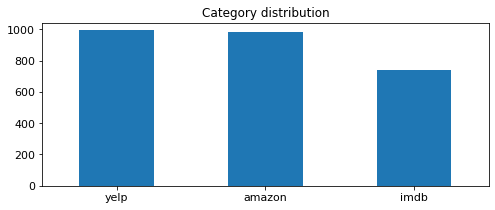

In [43]:
print(my_df.category_name.value_counts())

# plot barchart for X_sample
my_df.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

yelp      382
amazon    358
imdb      260
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

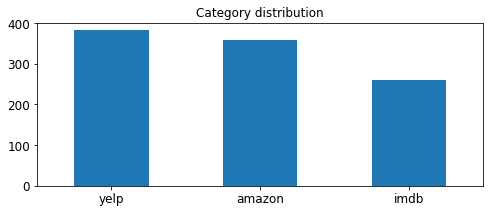

In [45]:
print(my_df_sample.category_name.value_counts())

# plot barchart for X_sample
my_df_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           rot = 0, fontsize = 12, figsize = (8,3))

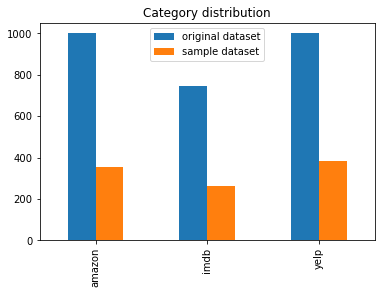

In [93]:
# plot barchart for my_df_sample
x=my_df_sample.category_name.value_counts()

# plot barchart for my_df_sample
y=my_df.category_name.value_counts()

#concatenate the two charts using the panda dataframe
df = pd.concat([y, x], axis=1, sort=True)

#set the keys
df.columns = ["original dataset", "sample dataset"]

#side by side comparison of the datasets
df.plot(kind="bar", title='Category distribution')

#displays the result using matplotlib
plt.show()

# Feature creation

In [48]:
#converting th text dataframe to tokens
my_df['unigrams'] = my_df['text'].apply(lambda x:tokenize_text(x))


In [49]:
#extracting the first 4 records of the unigram token
my_df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [50]:
#extracting 4 records 
my_df[0:4]

,text,value,category,category_name,unigrams
0,So there is no way for me to plug it in here i...,0,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,0,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,0,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,0,amazon,"[Tied, to, charger, for, conversations, lastin..."


In [130]:
count_vect1 = CountVectorizer()
my_df_counts = count_vect1.fit_transform(my_df.text)

In [131]:
analyze = count_vect1.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [132]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect1.get_feature_names()[0:20]

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980']

In [57]:
# we convert from sparse array to normal array
my_df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [133]:
count_vect1.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [96]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [97]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [61]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(my_df.index)[0:20]]

In [62]:
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_19',
 'doc_20']

In [63]:
plot_z = my_df_counts[0:20, 0:20].toarray()

In [64]:
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

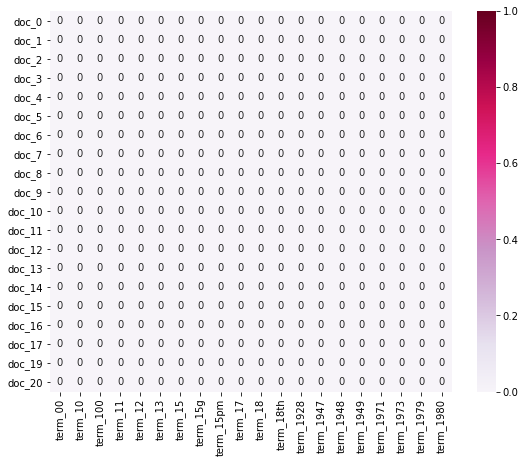

In [68]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

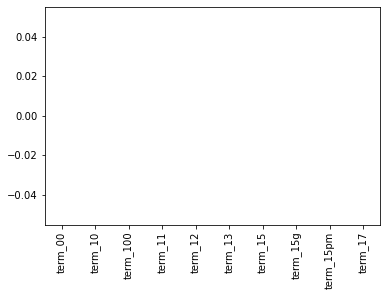

In [134]:
# We employ the use of matplotlib to create a bar chart to visualize the term document matrix


# first 10 samples only
plot_x = ["term_"+str(i) for i in count_vect1.get_feature_names()[0:10]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(my_df.index)[0:10]]

plot_z = my_df_counts[0:10, 0:10].toarray()

df_todraw = pd.DataFrame(plot_z,  index = plot_x, columns = plot_y)
df_todraw['total_count']=plot_z.sum(axis=1)

df_todraw['total_count'].plot.bar()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [100]:
my_df_reduced = PCA(n_components = 3).fit_transform(my_df_counts.toarray())

In [20]:
my_category_name

NameError: name 'my_category_name' is not defined

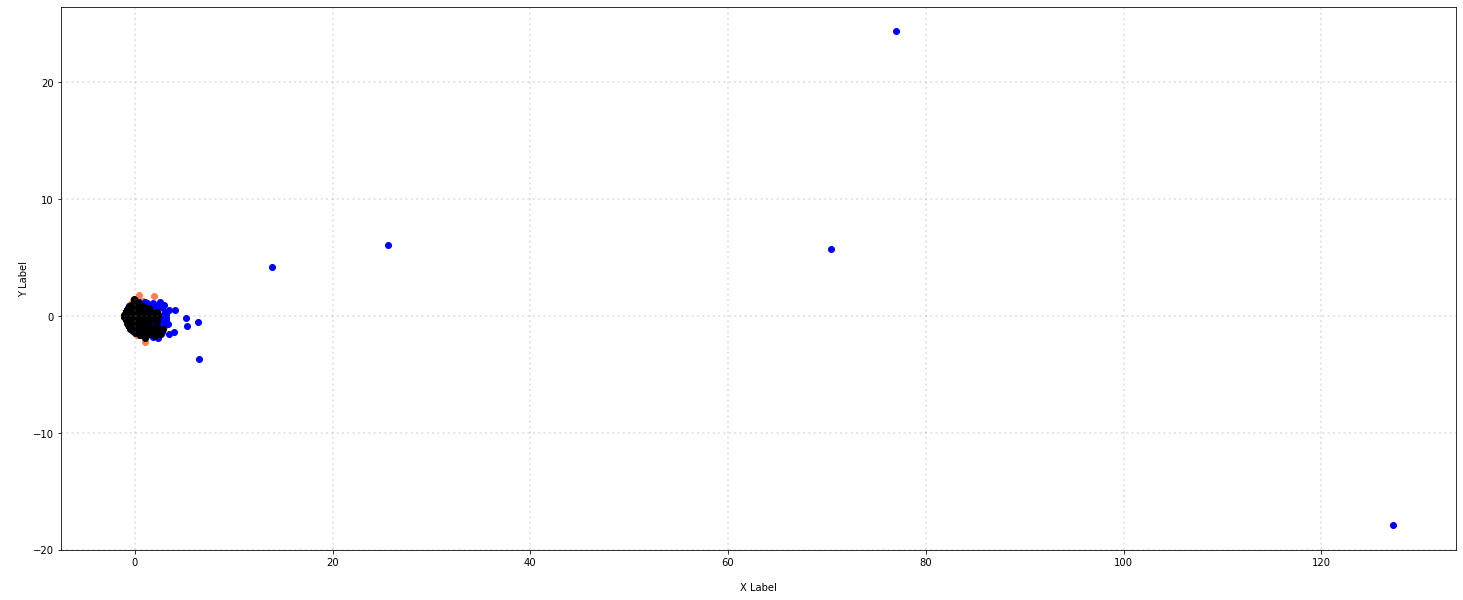

In [116]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, my_category_name):
    xs = my_df_reduced[my_df['category_name'] == category].T[0]
    ys = my_df_reduced[my_df['category_name'] == category].T[1]
 

   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

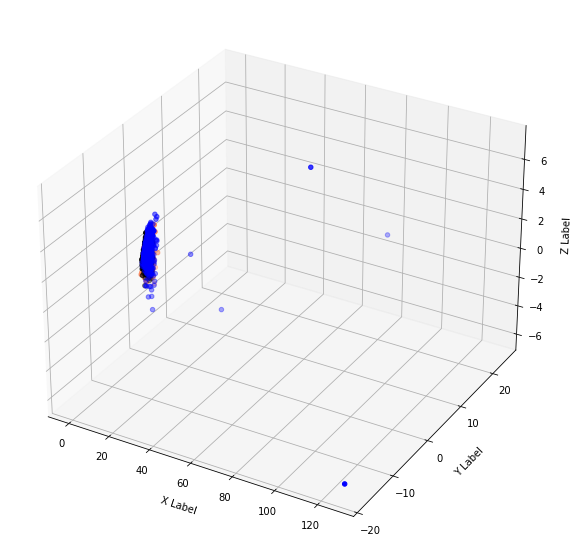

In [118]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, my_category_name):
    xs = my_df_reduced[my_df['category_name'] == category].T[0]
    ys = my_df_reduced[my_df['category_name'] == category].T[1]
    zs = my_df_reduced[my_df['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

In [119]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,my_df_counts.shape[1]):
    term_frequencies.append(sum(my_df_counts[:,j].toarray()))

In [120]:
term_frequencies = np.asarray(my_df_counts.sum(axis=0))[0]


In [123]:
term_frequencies[0]


1

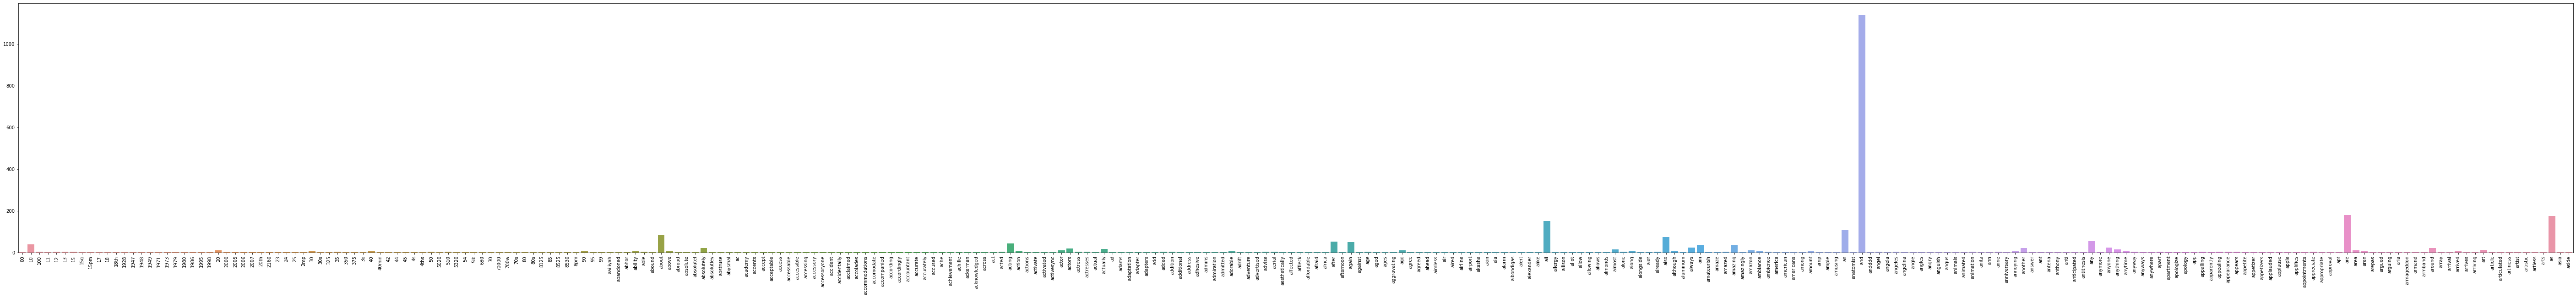

In [135]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect1.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [136]:
import plotly.express as px
#pio.renderers.default = "iframe"

long_df = px.bar(x=count_vect1.get_feature_names()[:300], 
            y=term_frequencies[:300])

#fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
long_df.show()

In [127]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

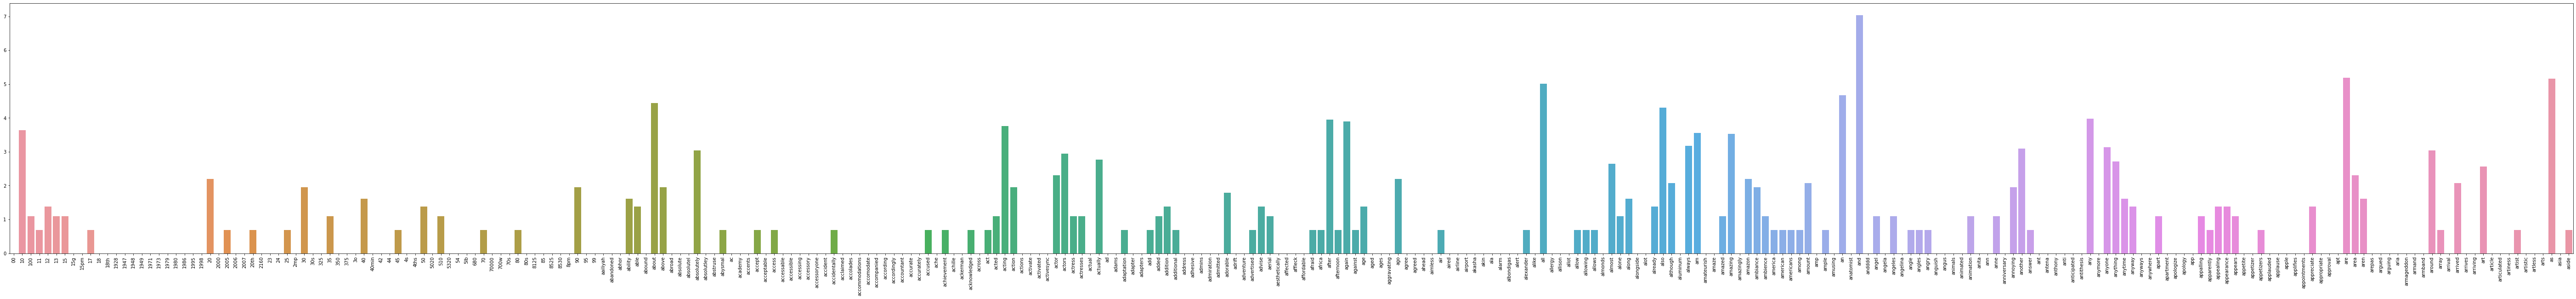

In [137]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect1.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);


# Part 3 Answers

In [42]:
from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, CDSView, GroupFilter
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel

# Visualizing the score rating of a sentence with its category using the BOKEH tool

In [82]:



west_top_2 = (my_df[(my_df['category_name'] == 'amazon') | (my_df['category_name'] == 'imdb')| (my_df['category_name'] == 'yelp')]
               .loc[:, ['text', 'value','category','category_name']]
             .sort_values(['category','value']))

# The figure will be right in my Jupyter Notebook
output_notebook()


# Isolate the data for the Rockets and Warriors
amazon_data = west_top_2[west_top_2['category_name'] == 'amazon']
imdb_data = west_top_2[west_top_2['category_name'] == 'imdb']
yelp_data = west_top_2[west_top_2['category_name'] == 'yelp']


# Create a ColumnDataSource object for each team
amazon_cds=ColumnDataSource(amazon_data)
imdb_cds=ColumnDataSource(imdb_data)
yelp_cds=ColumnDataSource(yelp_data)



# Create and configure the figure
fig = figure(x_axis_type='datetime',
             plot_height=600, plot_width=900,
             title='3 data sets for amazon, imdb and yelp data',
             x_axis_label='category', y_axis_label='value',
             toolbar_location=None)


# Render the race as step lines
fig.step('value', 'category',
         color='#CE1141', legend_label='Amazon', 
         source=amazon_cds)
fig.step('value', 'category', 
         color='#006BB6', legend_label='imdb',
         source=imdb_cds)

fig.step('value', 'category', 
         color='#007A33',legend_label='yelp',
         source=yelp_cds)

# Move the legend to the upper left corner
fig.legend.location = 'top_left'

# Show the plot
show(fig)

Loading BokehJS ...

# Using the ALTAIR visualization tool to visualize a sentence with positive and negative score rating for the first 50 records



In [92]:
import altair as alt
from altair import Chart, X, Y, Axis, SortField

dataset_top_10 = my_df.sort_values(by='text',ascending=False)[:50]

dataset_top_10.head()

Chart(dataset_top_10).mark_bar().encode(x='text', y='value')


alt.Chart(...)

# Visualizing all records

In [96]:

all_records = my_df.sort_values(by='text',ascending=False)


Chart(all_records).mark_bar().encode(x='text', y='value')







alt.Chart(...)

# visualizing sentence and the category they belong to with ALTAIR

In [97]:

dataset = my_df.sort_values(by='text',ascending=False)



Chart(dataset).mark_bar().encode(x='text', y='category_name')

alt.Chart(...)

# PART 3B - TF-IDF

In [104]:
#Extract the sentence and store it in doc variable
doc=my_df['text']


In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(doc)

In [107]:
# get the first vector out (for the first document) 
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 
 
# place tf-idf values in a pandas data frame 
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
converter,0.397248
unless,0.330300
plug,0.306854
in,0.301044
us,0.273380
...,...
feelings,0.000000
feeling,0.000000
feel,0.000000
fee,0.000000


# Part 3C - Naive Bayes

In [120]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

sns.set() # use seaborn plotting style

In [129]:
train, test = train_test_split(my_df, test_size=0.2)

print(len(train))
print(len(test))

print(train['category_name'])

2198
550
361    amazon
977      yelp
764      yelp
642    amazon
434      imdb
        ...  
507    amazon
603      yelp
182      imdb
826    amazon
196    amazon
Name: category_name, Length: 2198, dtype: object


In [130]:

# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(train['text'], train['category_name'])
# Predict the categories of the test data
predicted_categories = model.predict(test['text'])

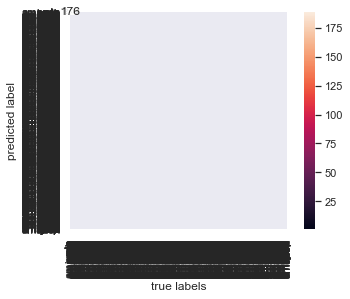

In [131]:

# plot the confusion matrix
mat = confusion_matrix(test['category_name'], predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=train['category_name'],yticklabels=train['category_name'])
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()


In [132]:
# custom function
def my_predictions(s, train=train, model=model):
    pred=model.predict([s])
    return train['category_name'][pred[0]]

In [ ]:
my_predictions('!!definitely recomend!!')